# Stellar Mass Table distribution fit
*Parse table from csv file*

In [2]:
from pandas import read_csv


df = read_csv('stellar_mass.csv')
df.head()

,mass,p,p_garden_host
0,2.0,0.002315,0.0
1,1.9,0.002315,0.0
2,1.8,0.003601,0.0
3,1.7,0.005080,0.0
4,1.6,0.005209,0.0


## Discrete probabilities
*the p column contains probability of the consecutives dice rolls corresponding to the star masses*

In [3]:
x = df.mass
y = df.p
df.p.sum()

0.9999999999999999

*creating random sample of 1000 elements from given probabilities*

In [4]:
from random import choices

sample = choices(list(df.mass), weights=list(df.p), k=1000)

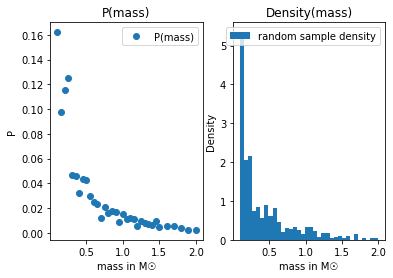

In [5]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(mass)")
axs[0].plot(x, y, 'o', label='P(mass)')
axs[0].set_xlabel('mass in M☉')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(mass)")
axs[1].hist(sample, density=True, bins=len(x), label='random sample density')
axs[1].set_xlabel('mass in M☉')
axs[1].set_ylabel('Density')
axs[1].legend()
plt.show()

## Continuous random variable fit
*Fitting a truncated exponential distribution to the random sample*

In [6]:
import numpy as np

upper, lower = x.max(), x.min()
mu = lower
sigma = np.std(sample)
b = (upper - lower) / sigma

b, mu, sigma

(5.035279184010602, 0.1, 0.37733756770297866)

In [7]:
from scipy.stats import truncexpon
from scipy.stats import kstest

dist = truncexpon(b=b, loc=mu, scale=sigma)
r = kstest(sample, [b, mu, sigma], 'truncexpon')
r

KstestResult(statistic=0.3333333333333333, pvalue=0.7797675963000349)

*Density function from the fitted continuous random variable*

In [8]:
y_pdf =  [dist.pdf(xi) for xi in x]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [9]:
fit_sample = dist.rvs(size=10000)

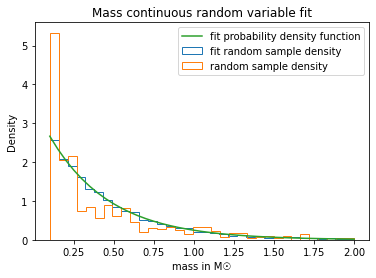

In [10]:
_, ax = plt.subplots()
ax.set_title(r"Mass continuous random variable fit")
ax.hist(fit_sample, density=True, histtype='step', bins=len(x), label='fit random sample density')
ax.hist(sample, density=True, histtype='step', bins=len(x), label='random sample density')
ax.plot(x, y_pdf, '-', label='fit probability density function')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [.1, 2.0]*

In [11]:
all(v >= .1 and v <= 2 for v in fit_sample)

True

## Discrete probabilities with modifier
*the p_gardern_host column contains modified probability of the dice rolls corresponding to the star masses*

In [12]:
x_garden_host = df.mass[df.p_garden_host > 0]
y_garden_host = df.p_garden_host[df.p_garden_host > 0]

y_garden_host.sum()

1.0000000009999999

*creating random sample of 1000 elements from given probabilities*

In [13]:
from random import choices

sample_garden_host = choices(list(df.mass), weights=list(df.p_garden_host), k=1000)

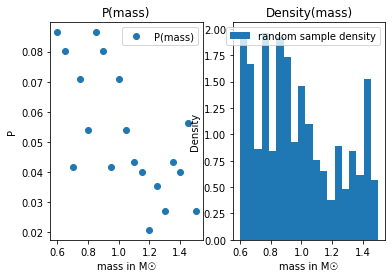

In [14]:
import matplotlib.pyplot as plt


_, axs = plt.subplots(1, 2)
axs[0].set_title(r"P(mass)")
axs[0].plot(x_garden_host, y_garden_host, 'o', label='P(mass)')
axs[0].set_xlabel('mass in M☉')
axs[0].set_ylabel('P')
axs[0].legend()
axs[1].set_title(r"Density(mass)")
axs[1].hist(sample_garden_host, density=True, bins=len(x_garden_host),
            label='random sample density')
axs[1].set_xlabel('mass in M☉')
axs[1].set_ylabel('Density')
axs[1].legend()
plt.show()

## Continuous random variable fit
*Fitting a truncated normal distribution to the random sample*

In [45]:
upper, lower = x_garden_host.max(), x_garden_host.min()
mu = lower
sigma = np.std(sample)
b = (upper - lower) / sigma

b, mu, sigma


(2.385132245057654, 0.6, 0.37733756770297866)

In [46]:
from scipy.stats import truncnorm

dist_garden_host = truncexpon(b=b, loc=mu, scale=sigma)
r = kstest(sample_garden_host, [b, mu, sigma], 'trunexpon')
r

KstestResult(statistic=0.5756666666666667, pvalue=0.1830857067184014)

*Density function from the fitted continuous random variable*

In [47]:
y_garden_host_pdf =  [dist_garden_host.pdf(xi) for xi in x_garden_host]

*Creating random sample of 1000 elements from the fitted continuous random variable*

In [48]:
fit_sample_garden_host = dist_garden_host.rvs(size=10000)

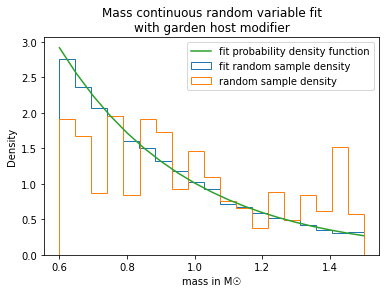

In [49]:
_, ax = plt.subplots()
ax.set_title(r"""Mass continuous random variable fit
with garden host modifier""")
ax.hist(fit_sample_garden_host, density=True, histtype='step', bins=len(x_garden_host), label='fit random sample density')
ax.hist(sample_garden_host, density=True, histtype='step', bins=len(x_garden_host), label='random sample density')
ax.plot(x_garden_host, y_garden_host_pdf, '-', label='fit probability density function')
ax.set_xlabel('mass in M☉')
ax.set_ylabel('Density')
ax.legend()
plt.show()

*All generated values in sample must be in interval [.6, 1.5]*

In [44]:
all(v >= .6 and v <= 1.5 for v in fit_sample_garden_host)

True